In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
baseball_df = pd.read_csv('salary_batting_people_2015_2014.csv')
baseball_df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,2014,ARI,NL,ahmedni01,508500,25,70,9,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,2014,ARI,NL,anderch01,512500,22,34,0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,2014,ARI,NL,chafian01,507500,3,2,0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,2014,ARI,NL,collmjo01,1400000,33,54,2,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIdelgara01,2015,2014,ARI,NL,delgara01,526000,47,9,0,...,Delgado,Randall Enrique,220,76,R,R,2011-06-17,2018-09-28,delgr001,delgara01


In [3]:
baseball_df.dtypes

uniqueid                  object
yearid                     int64
battingyearid              int64
teamid                    object
lgid                      object
playerid                  object
salary                     int64
games                      int64
bats                       int64
runs                       int64
hits                       int64
doubles                    int64
triples                    int64
homeruns                   int64
rbi                        int64
stolen_bases               int64
caught_stealing            int64
walks                      int64
strike_outs                int64
international_walks        int64
hit_by_pitch               int64
sacrifice_bunt             int64
sacrifice_flies            int64
hit_into_double_plays      int64
birthyear                  int64
birthmonth                 int64
birthday                   int64
birthcountry              object
birthstate                object
birthcity                 object
deathyear 

<AxesSubplot:>

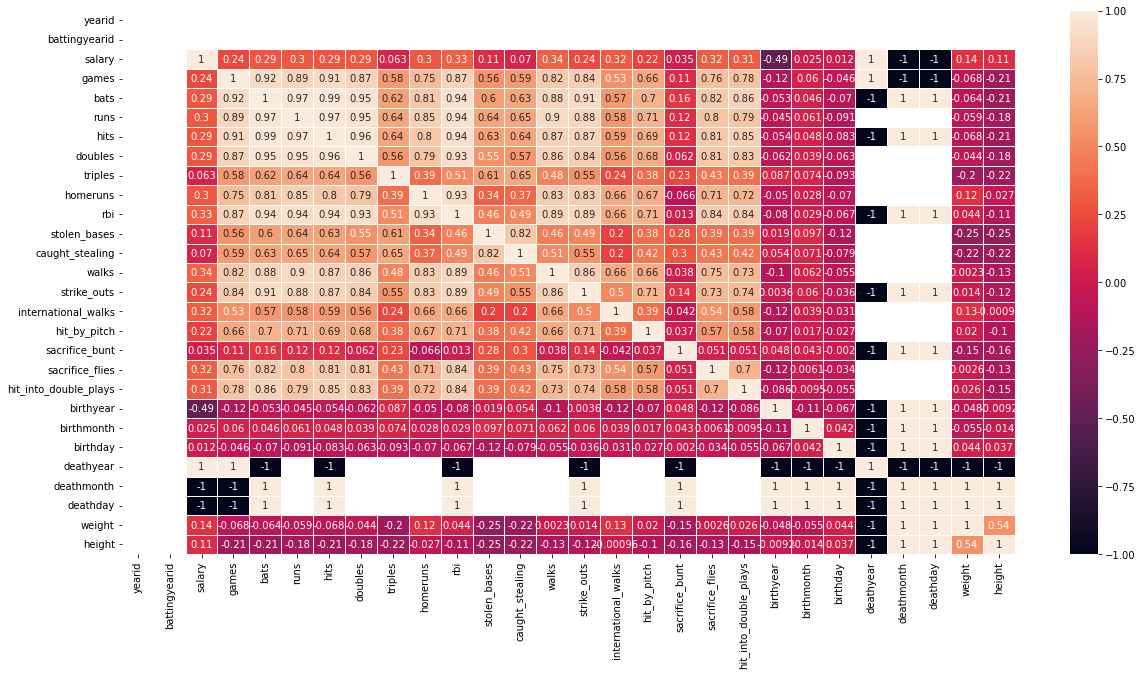

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(baseball_df.corr(),annot=True,linewidth=0.5)

In [5]:
# df=pd.DataFrame(baseball_df.corr()['salary']).reset_index()
# df['Beat Threshold']=abs(df['salary'])>0.5

# sns.lmplot(x='index', y="salary", data=df,hue='Beat Threshold',fit_reg=False,height=4,
#            aspect=4).set_xticklabels(rotation=90)

In [6]:
features=['bats','runs','hits','doubles', 'triples', 'homeruns','rbi','walks']

In [7]:
def scatter(attribute):
    p1=sns.lmplot(x=attribute, y="salary", data=baseball_df,fit_reg=False,height=8,aspect=4)
    ax = p1.axes[0,0]
    for i in range(len(baseball_df)):
        ax.text(baseball_df[attribute][i],baseball_df['salary'][i], baseball_df['namegiven'][i],
               fontsize='small',rotation=45)

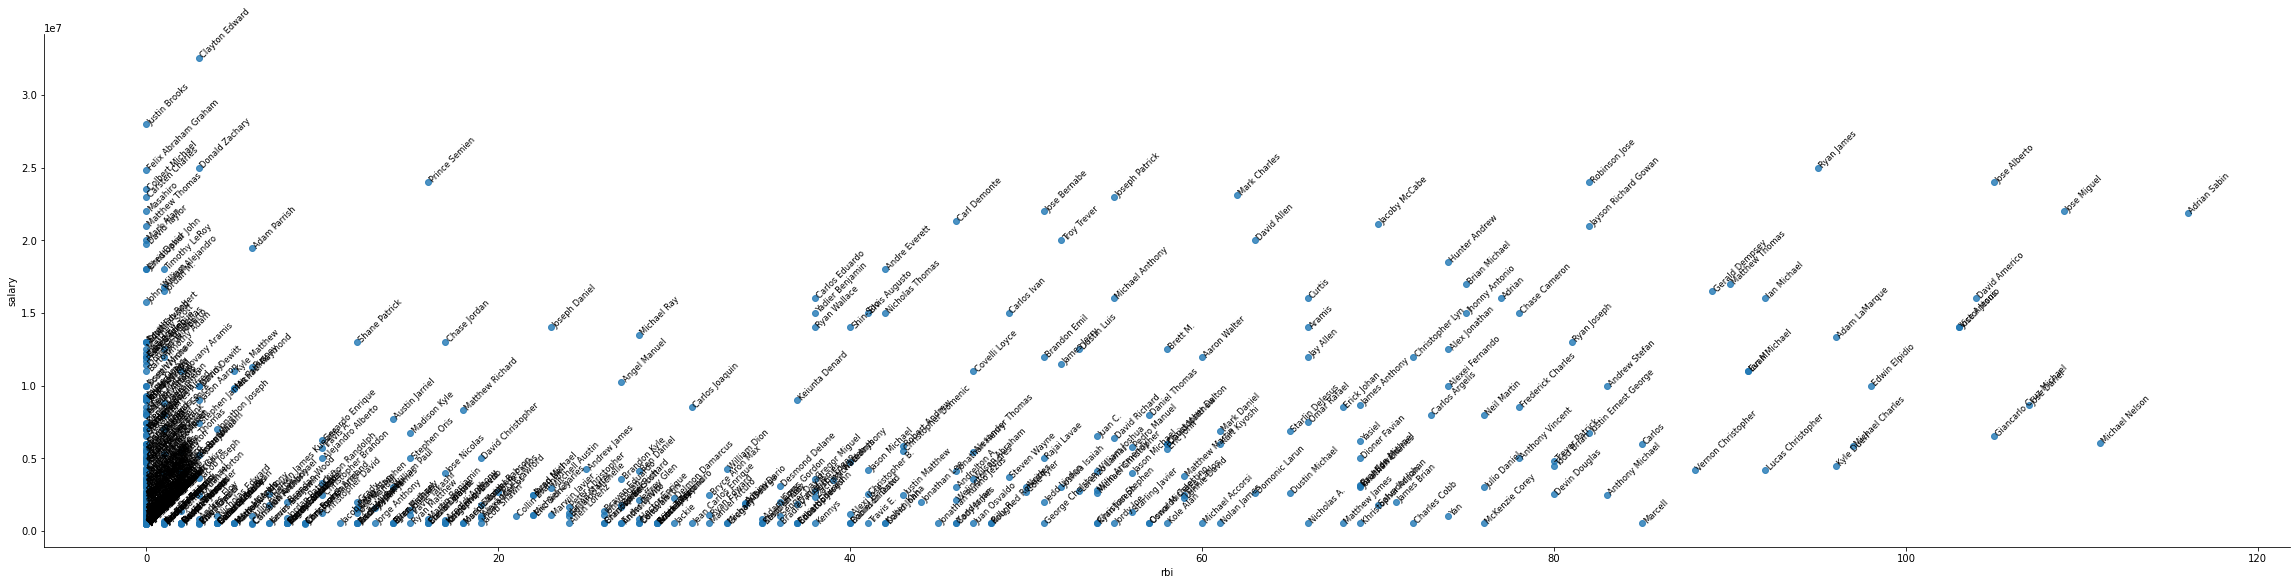

In [8]:
scatter('rbi')

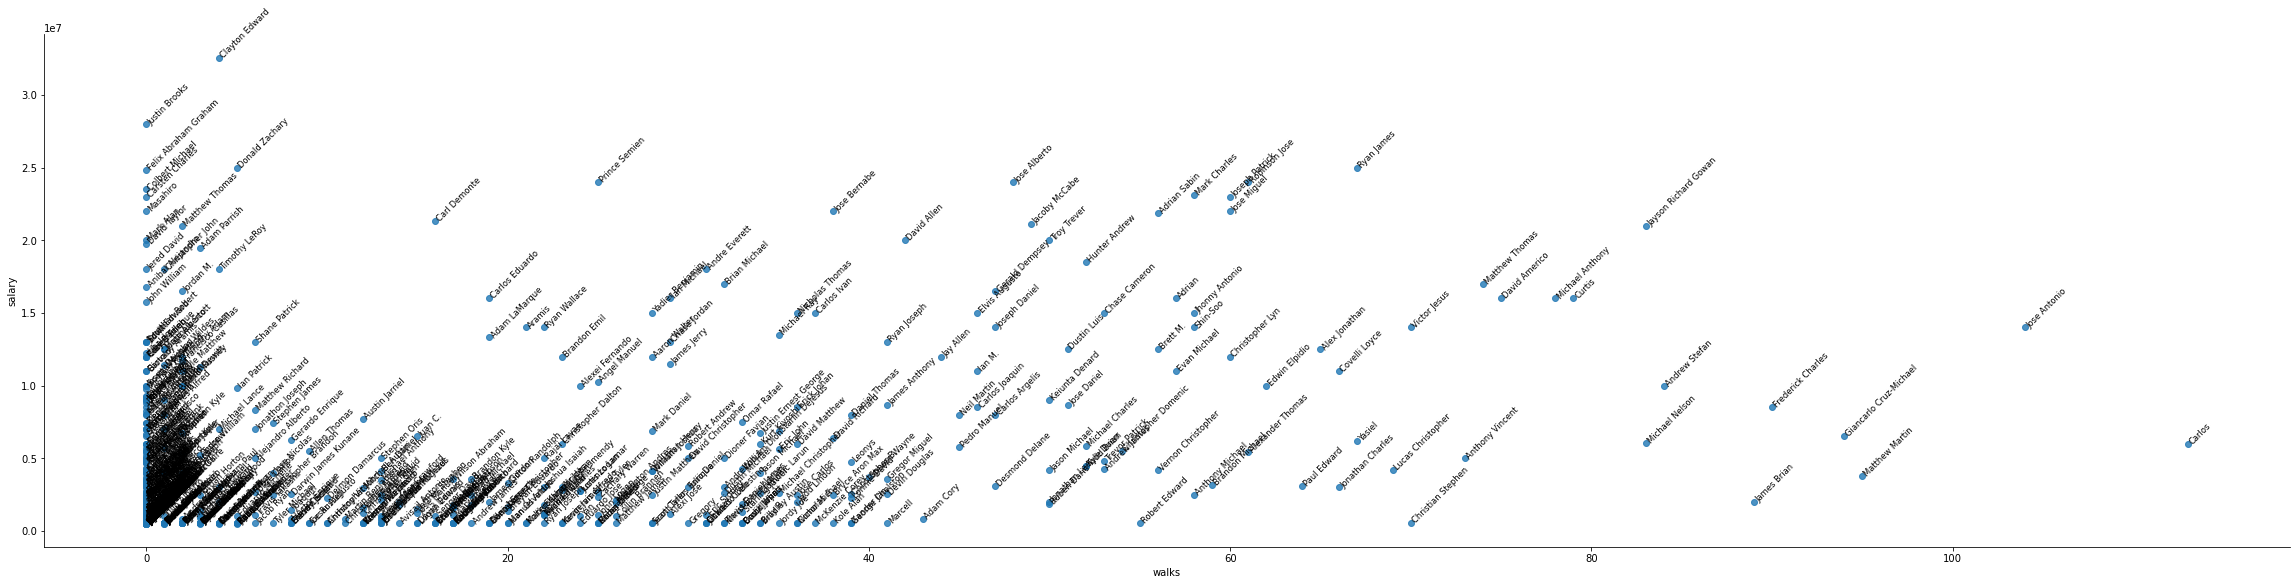

In [9]:
scatter('walks')

In [10]:
y=baseball_df['salary']
X=baseball_df[features]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [18]:
baseball_prediction_df=pd.DataFrame(val_X)
baseball_prediction_df['prediction']=predictions
baseball_prediction_df['ID']=[baseball_df['playerid'][index] for index in baseball_prediction_df.reset_index()['index']]
baseball_prediction_df['name']=[baseball_df['namegiven'][index] for index in baseball_prediction_df.reset_index()['index']]
baseball_prediction_df['salary']=[baseball_df['salary'][index] for index in baseball_prediction_df.reset_index()['index']]
# baseball_prediction_df=baseball_prediction_df[['namegiven','ID','bats','runs','hits','doubles','rbi','walks','salary','prediction']]
baseball_prediction_df

,bats,runs,hits,doubles,triples,homeruns,rbi,walks,prediction,ID,name,salary
518,34,4,7,2,0,1,4,3,5.085000e+05,frankni01,Nicholas Edward,1021800
347,24,6,8,1,2,0,3,1,3.630000e+06,pireljo01,Jose Manuel,510000
395,47,4,13,5,0,1,3,2,4.000000e+06,blancan01,Andres Eloy,850000
498,574,83,156,37,0,20,90,74,1.650000e+07,hollima01,Matthew Thomas,17000000
460,0,0,0,0,0,0,0,0,2.486612e+06,rodnefe01,Fernando,7000000
...,...,...,...,...,...,...,...,...,...,...,...,...
121,68,3,9,0,0,0,3,2,3.257100e+07,cuetojo01,Johnny,10000000
474,60,5,16,2,0,0,8,1,5.187000e+05,duffyma01,Matthew Michael,509000
440,400,37,84,17,1,10,51,36,5.129000e+05,gyorkje01,Jedd Lindon,2000000
558,0,0,0,0,0,0,0,0,2.486612e+06,hendrli01,Liam Johnson,518400


In [19]:
baseball_prediction_df['excess']=baseball_prediction_df['prediction']-baseball_prediction_df['salary']
baseball_prediction_df.sort_values(by='excess')

,bats,runs,hits,doubles,triples,homeruns,rbi,walks,prediction,ID,name,salary,excess
403,62,1,13,2,0,0,0,0,509300.0,hamelco01,Colbert Michael,23500000,-22990700.0
453,2,0,0,0,0,0,0,0,3525950.0,hernafe02,Felix Abraham Graham,24857000,-21331050.0
259,343,56,103,14,3,8,46,16,513850.0,crawfca02,Carl Demonte,21357000,-20843150.0
472,27,1,4,0,0,0,0,2,510000.0,cainma01,Matthew Thomas,21000000,-20490000.0
351,2,0,0,0,0,0,0,0,3525950.0,sabatcc01,Carsten Charles,23000000,-19474050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,355,30,84,11,0,5,34,50,23125000.0,tejadru01,Ruben Dario,1880000,21245000.0
4,9,0,1,0,0,0,0,0,22000000.0,delgara01,Randall Enrique,526000,21474000.0
121,68,3,9,0,0,0,3,2,32571000.0,cuetojo01,Johnny,10000000,22571000.0
584,7,0,2,1,0,0,0,0,28000000.0,stammcr01,Craig Nicholas,2250000,25750000.0


In [29]:
baseball_prediction_df.to_csv('baseball_prediction.csv', index = False)

In [31]:
# Just playing with some other stuff

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence


In [33]:
y=baseball_df['salary']
X=baseball_df[features]

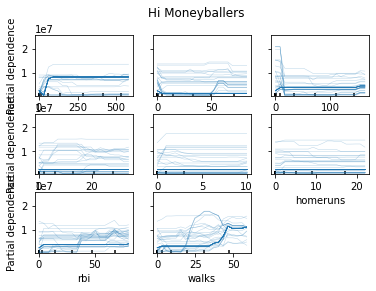

In [65]:
# features = ['bats', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'rbi', 'walks', 'salary']
est = RandomForestRegressor(n_estimators=10)
est.fit(X, y)
display = plot_partial_dependence(
est,
X,
features,
kind="individual",
subsample= 50,
n_jobs = 3,
grid_resolution=20,
random_state = 40,
)
display.figure_.suptitle(
    "Hi Moneyballers")
display.figure_.subplots_adjust(hspace=0.3)

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.datasets import fetch_covtype

# X, y = fetch_covtype(return_X_y=True)
y=baseball_df['salary']
X=baseball_df[features]
pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialCountSketch(degree=2, n_components=300),
    LogisticRegression(max_iter=1000),
)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=125, test_size=250, random_state=42
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.004

In [61]:
linear_baseline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))
linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.004